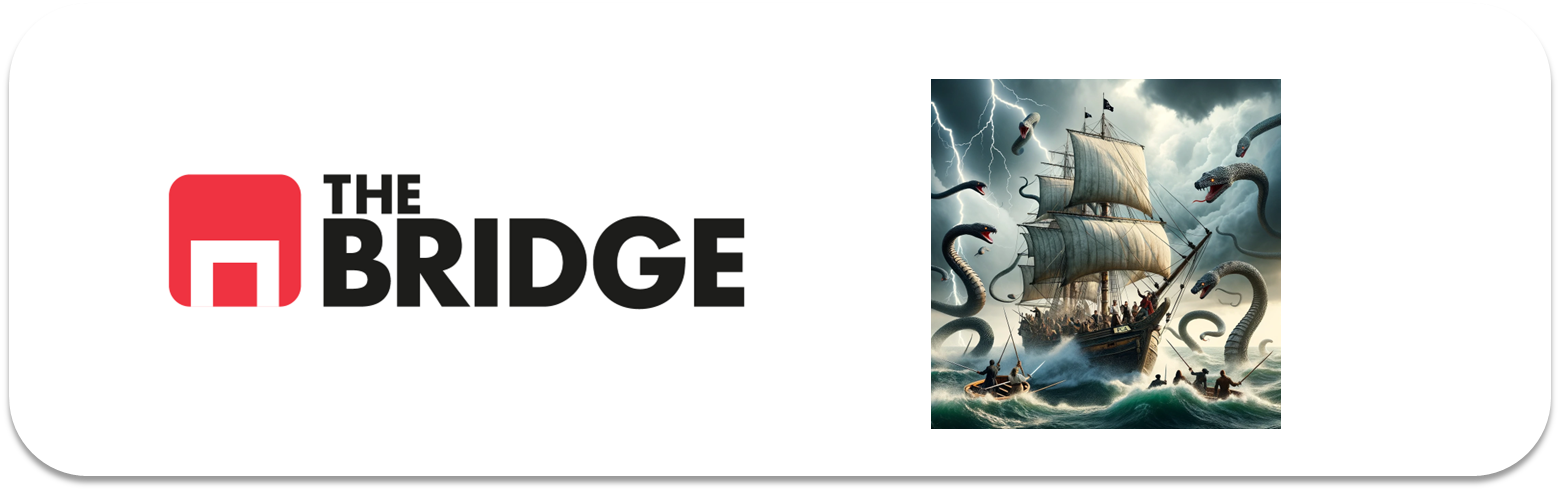

## PRACTICA OBLIGATORIA: **No Supervisado: PCA**

* La práctica obligatoria de esta unidad consiste en aplicar PCA a un dataset de imágenes con diferentes objetivos y compromisos. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### El problema de negocio

El Caesar Palace de las Vegas está planificando la instalación de mil quininetas microcámaras en los accesos a sus instalaciones para las próximas sesiones del "Poker World Championship". Estas microcámaras tienen la peculiaridad de que son capaces de tomar fotos encuadradas de las caras y la desventaja de que no tienen un gran ancho de banda de comunicación. (Las había de más ancho y de mayor precio...). NOTA: El ancho de banda limita el tamaño de las imágenes que pueden enviar las microcámaras).

El objetivo de las microcámaras es el de detectar personas "non-gratas" en tiempo real, pudiendo posprocesar las imágenes para poder detectar si han accedido a las instalaciones personas que estuvieran perseguidas por la ley, en los bancos de datos de los casinos identificadas como "peligrosas" (no se sabe si para el resto de personas o para los beneficios de los casinos) y en las listas de no admisión de jugadores adictos. Por eso no necesitan procesar los datos en tiempo real, pero sí enviarlos a un repositorio central. 

¿Cuál es su problema? O bien comprimen las imágenes y las procesan comprimidas en cada microcámara (pueden comprimir muy rápido pero no tienen cpu para procesarlas sin comprimir) o bien las comprimen y las mandan a un servidor central muy rápido (por eso ti) donde se descomprimirían y se analizarían. Analizar quiere decir en este contexto, pasarles un modelo de clasificación que determine si la persona de la imagen es una de las listas prohibidas (o sea que clasifique la imágen).  

Nos han enviado un dataset y con él debemos estudiar cuál de las dos soluciones es más interesante y dar recomendaciones al respecto. Vamos a ello.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,recall_score
from sklearn.model_selection import train_test_split,cross_val_score 

### #1 MODELO DE BASE

**Objetivo:** Construir un modelo baseline de clasficación de imágenes que las trate sin comprimir (es decir usando todos sus píxeles).

Para conseguir el objetivo, primero descarga el dataset de las caras de Olivetti que ya has utilizado anteriormente, empleando las funciones de sklearn necesarias. Luego, construye un clasificador con el modelo que consideres más apropiado y todas las features del dataset. Eso sí, recuerda hacer lo siguiente:

1. Construir un data frame con los datos 
2. Hacer un split en train y test con al menos 80 instancias en el test y estratificado según el target. Este split se ha de mantener en el resto de la práctica
3. Hacer un quick miniEDA o justificar el no hacerlo.
4. Medir la recall media (“balanced_accuracy”) sobre cross validation con 5 folds y sobre el conjunto de test y guarda ambas para usarlas como baseline en las siguientes partes




In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [3]:
olivetti.images.shape

(400, 64, 64)

In [4]:
olivetti.data.shape

(400, 4096)

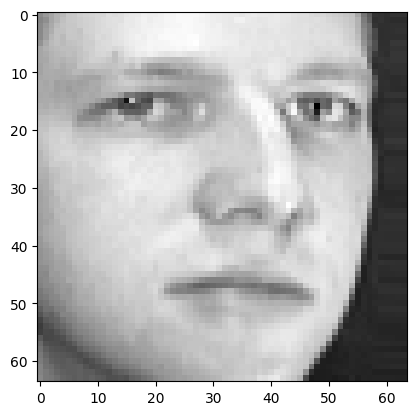

In [5]:
plt.imshow(olivetti.data[4].reshape(64,64), cmap="gray")
plt.show()

In [7]:
df = pd.DataFrame(olivetti.data, columns=[f"pixeles{i}"for i in range(olivetti.data.shape[1])])
df["face_id"] = olivetti.target

target = "face_id"
df

,pixeles0,pixeles1,pixeles2,pixeles3,pixeles4,pixeles5,pixeles6,pixeles7,pixeles8,pixeles9,...,pixeles4087,pixeles4088,pixeles4089,pixeles4090,pixeles4091,pixeles4092,pixeles4093,pixeles4094,pixeles4095,face_id
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


In [8]:
train_set, test_set = train_test_split(df, test_size=80,stratify=df[target],random_state=42)

In [9]:
X_train = train_set.drop(target,axis=1)
Y_train = train_set[target]

X_test = test_set.drop(target,axis=1)
Y_test = test_set[target]

In [10]:
rf_clf_importancia = RandomForestClassifier(random_state=42)
rf_clf_importancia.fit(X_train,Y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [11]:
rf_clf_importancia.feature_names_in_

array(['pixeles0', 'pixeles1', 'pixeles2', ..., 'pixeles4093',
       'pixeles4094', 'pixeles4095'], shape=(4096,), dtype=object)

In [12]:
rf_clf_importancia.feature_names_in_.cumsum()

array(['pixeles0', 'pixeles0pixeles1', 'pixeles0pixeles1pixeles2', ...,
       'pixeles0pixeles1pixeles2pixeles3pixeles4pixeles5pixeles6pixeles7pixeles8pixeles9pixeles10pixeles11pixeles12pixeles13pixeles14pixeles15pixeles16pixeles17pixeles18pixeles19pixeles20pixeles21pixeles22pixeles23pixeles24pixeles25pixeles26pixeles27pixeles28pixeles29pixeles30pixeles31pixeles32pixeles33pixeles34pixeles35pixeles36pixeles37pixeles38pixeles39pixeles40pixeles41pixeles42pixeles43pixeles44pixeles45pixeles46pixeles47pixeles48pixeles49pixeles50pixeles51pixeles52pixeles53pixeles54pixeles55pixeles56pixeles57pixeles58pixeles59pixeles60pixeles61pixeles62pixeles63pixeles64pixeles65pixeles66pixeles67pixeles68pixeles69pixeles70pixeles71pixeles72pixeles73pixeles74pixeles75pixeles76pixeles77pixeles78pixeles79pixeles80pixeles81pixeles82pixeles83pixeles84pixeles85pixeles86pixeles87pixeles88pixeles89pixeles90pixeles91pixeles92pixeles93pixeles94pixeles95pixeles96pixeles97pixeles98pixeles99pixeles100pixeles101pixeles102

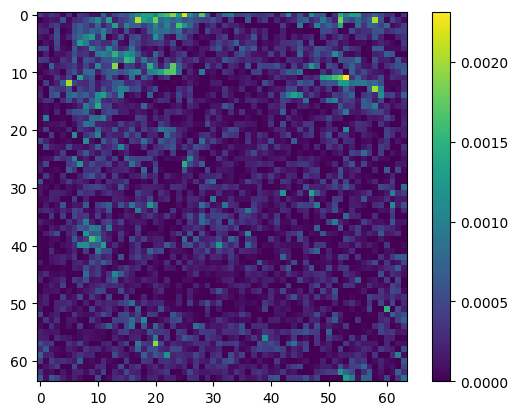

In [13]:
imagen_importancia = rf_clf_importancia.feature_importances_.reshape(64,64)
plt.imshow(imagen_importancia)
plt.colorbar()

In [14]:
pd.Series(rf_clf_importancia.feature_importances_).describe()

count    4096.000000
mean        0.000244
std         0.000280
min         0.000000
25%         0.000032
50%         0.000172
75%         0.000353
max         0.002314
dtype: float64

In [15]:
df_describe = X_train.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
pixeles0,320.0,0.402415,0.181016,0.086777,0.246901,0.400826,0.530992,0.805785
pixeles1,320.0,0.435873,0.189294,0.066116,0.267562,0.460744,0.574380,0.822314
pixeles2,320.0,0.478022,0.194538,0.090909,0.314050,0.512397,0.632231,0.871901
pixeles3,320.0,0.520868,0.193381,0.041322,0.383264,0.549587,0.669421,0.855372
pixeles4,320.0,0.558458,0.185826,0.111570,0.456612,0.586777,0.699380,0.863636
...,...,...,...,...,...,...,...,...
pixeles4091,320.0,0.332658,0.184645,0.012397,0.177686,0.301653,0.455579,0.785124
pixeles4092,320.0,0.335640,0.193152,0.049587,0.173554,0.301653,0.462810,0.921488
pixeles4093,320.0,0.323631,0.188717,0.057851,0.173554,0.293388,0.446281,0.929752
pixeles4094,320.0,0.315457,0.181919,0.061983,0.177686,0.278926,0.418388,0.884298


count    4096.000000
mean        0.690177
std         0.097665
min         0.396694
25%         0.636364
50%         0.702479
75%         0.756198
max         0.946281
Name: rango, dtype: float64


<Axes: xlabel='rango', ylabel='Count'>

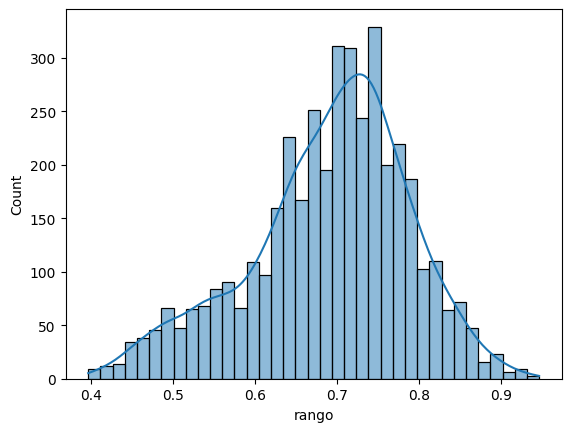

In [16]:
df_describe["rango"] = df_describe["max"] - df_describe["min"]
print(df_describe["rango"].describe())
sns.histplot(df_describe["rango"],kde=True)

<Axes: ylabel='rango'>

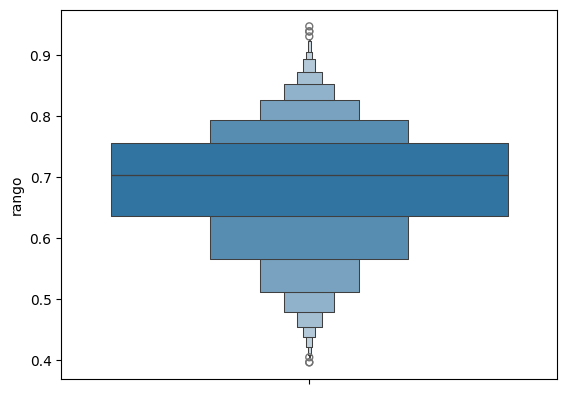

In [17]:
sns.boxenplot(df_describe["rango"])

In [18]:
y_pred = rf_clf_importancia.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         2
          17       0.67    

In [19]:
baseline_test = recall_score(Y_test,y_pred,average="macro")
baseline_test

0.95

In [20]:
baseline_cv = np.mean(cross_val_score(rf_clf_importancia,X_train,Y_train,cv=5,scoring="balanced_accuracy"))
baseline_cv

np.float64(0.9349999999999999)

In [22]:
baseline_cv = round(baseline_cv,3)
baseline_cv

np.float64(0.935)

### #2 MODELO PARA LAS MICROCÁMARAS
**Objetivo:** Construir un modelo que pueda funcionar en las microcámaras, es decir que pueda funcionar con datos comprimidos.

Para cumplir con el objetivo se os ocurre emplear la doble propiedad de la PCA, que permite comprimir datos y mantener la capacidad informativa de estos. Sigue los siguientes pasos:
1. Instancia un objeto PCA sobre los datos de Train sin especificar ni componentes ni varianza explicada (o sea sin pasar argumentos).
2. Escoge un rango de valores para el número de PCAs que permitan por lo menos una compresión de la imagen de entre el 0.2% y el 2.5% (prueba al menos 5 valores). NOTA: La compresión es la reducción total, es decir una reducción del 1% quiere decir que el dataset se reduce a un 1% de su tamaño original)
3. Para el rango anterior entrena un modelo de clasificación y apunta su scoring en una validación cruzada de 5 folds y métrica el recall medio y su scoring contra test.
4. Muestra en un dataframe el valor de numero de componentes principales empleado, el scoring en CV, el scoring contra test, el % de compresión, la diferencia con el scoring de CV del modelo base, la diferencia con el scoring en test.
5. Escoge el número de componentes que permitirían tener la mayor compresión con una pérdida inferior a 3 puntos porcentuales tanto en CV como en test. Si no hay escoge el que tenga una pérdida inferior a 5 puntos porcentuales. 

In [23]:
X_train.shape

(320, 4096)

In [24]:
pca = PCA()
pca.fit(X_train)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

In [25]:
X_train.shape

(320, 4096)

In [26]:
pca.explained_variance_ratio_[:120].cumsum()

array([0.23813331, 0.36946252, 0.45315522, 0.50389934, 0.5408254 ,
       0.57337344, 0.5975542 , 0.6184816 , 0.63774323, 0.6546737 ,
       0.6705587 , 0.6852649 , 0.69815856, 0.7102453 , 0.721577  ,
       0.7311503 , 0.73992395, 0.7484213 , 0.75619745, 0.7636284 ,
       0.77095926, 0.7773812 , 0.783356  , 0.78905064, 0.79466647,
       0.80011314, 0.80530095, 0.8103081 , 0.8151072 , 0.8196717 ,
       0.82403654, 0.82807946, 0.8318867 , 0.83535415, 0.8387454 ,
       0.8420228 , 0.84523827, 0.8483992 , 0.851304  , 0.8541672 ,
       0.85694045, 0.85961473, 0.8621612 , 0.86464375, 0.8670958 ,
       0.8694815 , 0.87184435, 0.8741368 , 0.8762934 , 0.8783984 ,
       0.8804134 , 0.88239527, 0.8843369 , 0.8862382 , 0.8881126 ,
       0.8899192 , 0.8916902 , 0.89343494, 0.89514065, 0.89681673,
       0.8984442 , 0.9000511 , 0.90159816, 0.9030911 , 0.9045728 ,
       0.9059977 , 0.90741324, 0.9088114 , 0.91019344, 0.91154474,
       0.91288066, 0.9141537 , 0.91541964, 0.9166413 , 0.91785

In [27]:
num_features = len(X_train.columns)
num_pcs = 0.2 * num_features/100
num_pcs

8.192

In [28]:
compresion_maxima = 0.2
compresion_minima = 2.5
num_pcs = []
num_features = len(X_train.columns)

for rango in np.linspace(compresion_maxima,compresion_minima,5):
    num_pc = int(rango * num_features/100)
    print(f"{rango:0.3f}% de compresion voy a probar {num_pc} PCs")
    num_pcs.append(num_pc)
print("Rangos probar")
print(num_pcs)

0.200% de compresion voy a probar 8 PCs
0.775% de compresion voy a probar 31 PCs
1.350% de compresion voy a probar 55 PCs
1.925% de compresion voy a probar 78 PCs
2.500% de compresion voy a probar 102 PCs
Rangos probar
[8, 31, 55, 78, 102]


In [29]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca

array([[ 5.6987762e-02,  1.7112665e+00, -2.7042074e+00, ...,
        -1.5404426e-02, -1.0809749e-02, -9.2759728e-06],
       [ 9.9309311e+00, -5.0016532e+00,  1.4829485e+00, ...,
         2.0612337e-02, -9.2760921e-03, -9.0822577e-06],
       [ 2.8180695e+00,  3.1814890e+00, -1.0919504e+00, ...,
         1.6491063e-02, -1.6725697e-02, -9.0897083e-06],
       ...,
       [-1.0048666e+01, -1.5325403e-01,  3.1931877e-02, ...,
         1.1179067e-02,  3.2680780e-03, -9.2014670e-06],
       [ 2.6487770e+00,  1.0503259e+00, -2.9578276e+00, ...,
         1.4113933e-02, -1.8918246e-02, -9.3281269e-06],
       [ 5.1369743e+00,  1.2605481e+00,  1.9049616e+00, ...,
        -2.1497160e-03,  3.1499892e-02, -9.4026327e-06]],
      shape=(320, 320), dtype=float32)

In [30]:
X_test_pca

array([[ 5.49922943e-01,  2.70864773e+00,  2.55600405e+00, ...,
         1.01152964e-01, -4.36285511e-02, -9.46390629e-03],
       [ 1.57260132e+00, -4.92623138e+00,  2.59580588e+00, ...,
        -4.81023267e-02, -1.76182956e-01,  1.57414600e-02],
       [ 3.53114319e+00,  3.95393181e+00,  1.36872721e+00, ...,
        -8.64661261e-02,  5.67189008e-02,  3.68313491e-02],
       ...,
       [ 6.45771408e+00,  3.40637398e+00, -1.44057417e+00, ...,
         6.95422366e-02,  1.18082374e-01,  5.63537776e-02],
       [ 4.66656113e+00, -2.12888956e+00,  3.61212087e+00, ...,
         1.03900328e-01,  2.86287785e-01,  4.47991788e-02],
       [ 1.65197372e+00,  2.41604996e+00, -2.15092659e+00, ...,
         1.18109733e-02,  2.05257237e-02, -1.62219256e-03]],
      shape=(80, 320), dtype=float32)

In [31]:
num_pcs

[8, 31, 55, 78, 102]

In [32]:
pd.DataFrame(X_train_pca[:,:120])

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.056988,1.711267,-2.704207,-1.373929,-1.453248,0.381901,1.044008,2.071069,-0.581384,-1.298216,...,0.071547,-0.080342,-0.120107,-0.195336,0.232515,-0.149983,-0.056647,0.294689,0.409563,0.185448
1,9.930931,-5.001653,1.482949,1.453286,1.822171,-1.578502,1.418205,-0.047977,0.194377,0.028489,...,0.330046,-0.457215,-0.042597,-0.111132,0.305687,-0.455763,0.335999,0.041679,-0.202242,0.246135
2,2.818069,3.181489,-1.091950,1.348543,-0.901577,-0.619283,1.358772,-0.539955,0.485820,-0.024828,...,-0.176739,0.119341,-0.012124,0.059618,-0.040176,0.275511,-0.049944,0.073259,-0.066575,-0.408215
3,1.718906,-6.751399,-0.149670,-0.282958,-1.075765,1.124096,2.538235,0.655480,-1.155669,0.240359,...,0.344815,0.273910,0.073698,0.141957,0.632422,0.386700,-0.122668,0.231199,-0.017682,-0.196249
4,2.330811,5.347819,1.583537,-2.392993,-2.441762,-0.568963,-1.091207,-1.199135,2.075010,-0.298126,...,0.234769,0.107210,0.090817,-0.087711,0.378586,0.026575,0.113537,-0.063650,-0.264172,-0.207730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,3.272587,-2.657258,0.385553,1.345017,-2.093497,0.213591,2.935343,-3.166190,-0.687938,-0.806205,...,0.522023,-0.345172,0.178667,0.017379,-0.067928,-0.139472,0.057474,0.000961,-0.182878,0.038644
316,-1.594883,2.194948,-1.605908,-3.996033,0.449130,1.649894,0.482944,-3.481723,-0.309531,0.646618,...,-0.276802,-0.447855,0.133568,0.116766,-0.082351,-0.563976,-0.445100,0.377796,-0.303235,-0.277618
317,-10.048666,-0.153254,0.031932,0.426837,-0.415290,-1.338414,0.052053,-2.254850,-0.487049,-0.012556,...,0.629658,0.282652,-0.065857,-0.622700,-0.156105,0.510499,-0.122370,0.114710,-0.103116,0.226631
318,2.648777,1.050326,-2.957828,0.831131,-1.424499,1.058619,1.249932,-0.337575,1.098650,0.329089,...,-0.019468,-0.058508,0.045539,-0.350002,-0.072242,-0.172130,-0.230975,-0.311170,-0.243464,-0.032573


In [34]:
lista_valores = []

for num_pc in num_pcs:
    X_train_temp = X_train_pca[:,:num_pc]
    X_test_temp = X_test_pca[:,:num_pc]

    rf_clf = RandomForestClassifier(random_state=42)
    eval_cv = np.mean(cross_val_score(rf_clf,X_train_temp,Y_train,cv=5,scoring="balanced_accuracy"))

    rf_clf.fit(X_train_temp,Y_train)
    y_pred = rf_clf.predict(X_test_temp)

    eval_test= recall_score(Y_test,y_pred,average="macro")

    datos = {
        "num_pc": num_pc,
        "factor_compresión": round(num_pc / num_features * 100, 3),
        "eval_cv": round(eval_cv * 100, 3),
        "baseline_cv": round(baseline_cv * 100, 3),
        "diff_cv": round((baseline_cv - eval_cv) * 100, 3),
        "eval_test": round(eval_test * 100, 3),
        "baseline_test": round(baseline_test * 100, 3),
        "diff_test": round((baseline_test - eval_test) * 100, 3),
    }
    lista_valores.append(datos.copy())
    


In [35]:
lista_valores

[{'num_pc': 8,
  'factor_compresión': 0.195,
  'eval_cv': np.float64(80.5),
  'baseline_cv': np.float64(93.5),
  'diff_cv': np.float64(13.0),
  'eval_test': 76.25,
  'baseline_test': 95.0,
  'diff_test': 18.75},
 {'num_pc': 31,
  'factor_compresión': 0.757,
  'eval_cv': np.float64(90.5),
  'baseline_cv': np.float64(93.5),
  'diff_cv': np.float64(3.0),
  'eval_test': 93.75,
  'baseline_test': 95.0,
  'diff_test': 1.25},
 {'num_pc': 55,
  'factor_compresión': 1.343,
  'eval_cv': np.float64(91.5),
  'baseline_cv': np.float64(93.5),
  'diff_cv': np.float64(2.0),
  'eval_test': 93.75,
  'baseline_test': 95.0,
  'diff_test': 1.25},
 {'num_pc': 78,
  'factor_compresión': 1.904,
  'eval_cv': np.float64(91.25),
  'baseline_cv': np.float64(93.5),
  'diff_cv': np.float64(2.25),
  'eval_test': 92.5,
  'baseline_test': 95.0,
  'diff_test': 2.5},
 {'num_pc': 102,
  'factor_compresión': 2.49,
  'eval_cv': np.float64(89.5),
  'baseline_cv': np.float64(93.5),
  'diff_cv': np.float64(4.0),
  'eval_test'

In [36]:
df_resultados = pd.DataFrame(lista_valores)
df_resultados

,num_pc,factor_compresión,eval_cv,baseline_cv,diff_cv,eval_test,baseline_test,diff_test
0,8,0.195,80.50,93.5,13.00,76.25,95.0,18.75
1,31,0.757,90.50,93.5,3.00,93.75,95.0,1.25
2,55,1.343,91.50,93.5,2.00,93.75,95.0,1.25
3,78,1.904,91.25,93.5,2.25,92.50,95.0,2.50
4,102,2.490,89.50,93.5,4.00,95.00,95.0,0.00


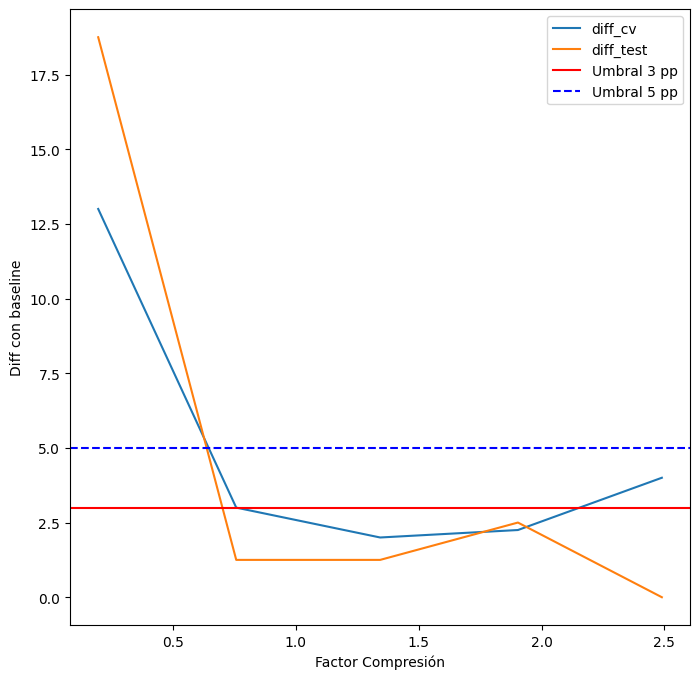

In [ ]:
plt.figure(figsize=(8,8))
umbral_corte_1 = 3
umbral_corte_2 = 5

for lineas in ["diff_cv", "diff_test"]:
    plt.plot(df_resultados["factor_compresión"], df_resultados[lineas], label = lineas)

plt.xlabel("Factor Compresión")
plt.ylabel("Diff con baseline")

plt.axhline(y = umbral_corte_1, color = 'r', linestyle = '-', label = f"Umbral {umbral_corte_1} pp")
plt.axhline(y = umbral_corte_2, color = "b", linestyle = "--", label = f"Umbral {umbral_corte_2} pp")

plt.legend()
plt.show()

In [38]:
cumple_umbral_1 = (df_resultados["diff_cv"] <= umbral_corte_1) | (df_resultados["diff_test"] <= umbral_corte_1)
df_resultados[cumple_umbral_1]

,num_pc,factor_compresión,eval_cv,baseline_cv,diff_cv,eval_test,baseline_test,diff_test
1,31,0.757,90.50,93.5,3.00,93.75,95.0,1.25
2,55,1.343,91.50,93.5,2.00,93.75,95.0,1.25
3,78,1.904,91.25,93.5,2.25,92.50,95.0,2.50
4,102,2.490,89.50,93.5,4.00,95.00,95.0,0.00


In [ ]:
compresion_maxima = 0.1
compresion_minima = 1

num_pcs = []
num_features = len(X_train.columns) 

for rango in np.linspace(compresion_maxima, compresion_minima, 5):
   
    num_pc = int(rango * num_features / 100)
    num_pcs.append(num_pc)

print("Rangos que voy a probar:")
print(num_pcs)

Rangos que voy a probar:
[4, 13, 22, 31, 40]


In [42]:
lista_valores = []

for num_pc in num_pcs:
    pca_temp = PCA(num_pc) 
    X = pca_temp.fit_transform(X_train)
    X_t = pca_temp.transform(X_test)
    
    X_train_temp = pca_temp.inverse_transform(X)
    print("num pcas:", num_pc, "num features descomprimidas: ", X_train_temp.shape[1])
    X_test_temp = pca_temp.inverse_transform(X_t) 
    
    rf_clf = RandomForestClassifier(random_state = 42)
    eval_cv = np.mean(cross_val_score(rf_clf, X_train_temp, Y_train, cv = 5, scoring = "balanced_accuracy"))
    
    rf_clf.fit(X_train_temp, Y_train)
    y_pred = rf_clf.predict(X_test_temp)
    eval_test = recall_score(Y_test, y_pred, average = "macro")
    
    datos = {
        "num_pc": num_pc,
        "factor_compresión": round(num_pc/num_features*100, 2),
        "eval_cv": round(eval_cv * 100, 2),
        "baseline_cv": round(baseline_cv * 100, 2),
        "diff_cv": round((baseline_cv - eval_cv) * 100, 2),
        "eval_test": round(eval_test * 100, 2),
        "baseline_test": round(baseline_test * 100, 2),
        "diff_test": round((baseline_test - eval_test) * 100, 2),
    }
    
    lista_valores.append(datos.copy())

num pcas: 4 num features descomprimidas:  4096
num pcas: 13 num features descomprimidas:  4096
num pcas: 22 num features descomprimidas:  4096
num pcas: 31 num features descomprimidas:  4096
num pcas: 40 num features descomprimidas:  4096


In [43]:
df_resultados = pd.DataFrame(lista_valores)
df_resultados

,num_pc,factor_compresión,eval_cv,baseline_cv,diff_cv,eval_test,baseline_test,diff_test
0,4,0.10,61.75,93.5,31.75,57.50,95.0,37.50
1,13,0.32,86.50,93.5,7.00,88.75,95.0,6.25
2,22,0.54,90.25,93.5,3.25,91.25,95.0,3.75
3,31,0.76,90.50,93.5,3.00,95.00,95.0,0.00
4,40,0.98,91.50,93.5,2.00,93.75,95.0,1.25


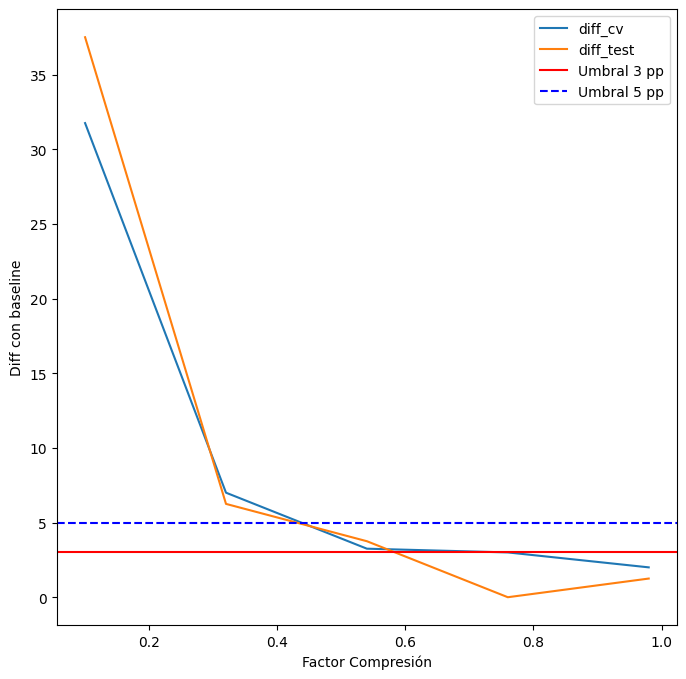

### #3 COMPRESION PARA CLASIFICACION POSTERIOR

**Objetivo**: Obtener el número de componentes que permita una compresión menor y al tiempo que el modelo en el servidor central no baje su rendimiento respecto a no usar imágenes comprimidas.

Para esta parte la idea que se os ha ocurrido es emplear también la PCA como compresor ya que así siempre podrían pasar a la opción anterior si eso fuese suficiente. Pero en este caso no vamos a utilizar el dataset comprimido con las PCAs para detectar las caras, sino el dataset una vez descomprimido (recuerda que puede emplear `inverse_transform` para "descomprimir"). Los pasos a seguir son:

1. Escoge un rango de valores que  permitan una compresión aún mayor (recuerda que el ancho de banda es mínimo) entre el 1 por mil y el 1 por ciento. Escoge 5 valores de número de PCAs que permitan movernos en ese rango.
2. Para cada uno de esos valores: aplica la PCA al X_train, obten un X_train_unzipped aplicando la inversa de la PCA y entrena un modelo de clasificación y pruébalo contra test, apunta el balanced accuracy.
3. Crea un dataframe o haz un visualización comparando como es la medidad de balance accuracy para cada valor de número de pcas escogido y cuál su factor de compresión. 
4. Sabiendo que no podemos perder más de 3 puntos porcentuales respecto al baseline, ¿qué numero de PCA escogerías?

In [ ]:
compresion_maxima = 0.1
compresion_minima = 1

num_pcs = []
num_features = len(X_train.columns) 

for rango in np.linspace(compresion_maxima, compresion_minima, 5):
    
    num_pc = int(rango * num_features / 100)
    num_pcs.append(num_pc)

print("Rangos que voy a probar:")
print(num_pcs)

Rangos que voy a probar:
[4, 13, 22, 31, 40]


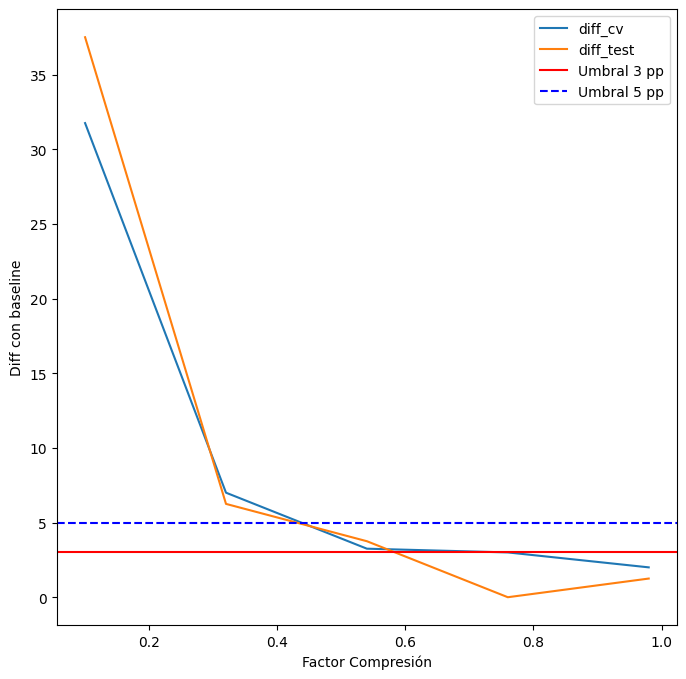

In [45]:
plt.figure(figsize=(8,8))
umbral_corte_1 = 3 
umbral_corte_2 = 5

for lineas in ["diff_cv", "diff_test"]:
    plt.plot(df_resultados["factor_compresión"], df_resultados[lineas], label = lineas)

plt.xlabel("Factor Compresión")
plt.ylabel("Diff con baseline")
plt.axhline(y = umbral_corte_1, color = 'r', linestyle = '-', label = f"Umbral {umbral_corte_1} pp")
plt.axhline(y = umbral_corte_2, color = "b", linestyle = "--", label = f"Umbral {umbral_corte_2} pp")
plt.legend()
plt.show()

### #EXTRA

1. Para la segunda parte, visualiza en cuatro gráficos un scatter plot de las dos primeras componentes principales de la PCA escogida y colorea cada punto con las clases correspondientes a cada cara (como hay 40 clases, usa 10 por gráfico, 1-10 en el primero, 11-20 en el segundo, etc)
2. Para la tercer parte crea una función (modifica la de la práctica de la unidad de KMeans, por ejemplo) que permita ver la cara sin comprimir y la cara después de haberla descomprimido y haz una comprobación de cómo quedan (visualiza 5 caras por ejemplo) para cada uno de los valores de números de PCAs probados. Añade el caso para 150 y 320 PCs para que se vea que son las mismas claras con claridad.